In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [3]:
df = pd.read_csv('../data/everytime_seoul.csv')
df

,Unnamed: 0,0,1,2,3,4
0,0,1,8,2020/6분 전,나만 코로나 안무섭냐,한 9월 초까지만해도 친구들만날때 마스크 안쓰고 나가다가 친구들이 야 너 그러다 사...
1,1,0,0,2020/10분 전,코로나 확산세인가봐,나 본가 이제야 확진자 20번대 진입할 정도로 완전 지방인데 어제오늘 사이 5명 ...
2,2,0,2,2020/11/19 17:23,오우 학교에서 코로나 문자왔네,근데 진짜 신촌지역 웬만해서 오지마 진심으로. 위험함
3,3,0,0,2020/11/19 16:58,시발 lms 언제되는데;;,코로나 심해지는데 학교에서는 걍 대면시험 친대고 LMS 서버랑 학교 홈페이지는 심심...
4,4,0,4,2020/11/19 15:14,서강대도 코로나 터졌네..,신촌 무섭다
...,...,...,...,...,...,...
1228,1228,3,16,2020/02/01 18:42,중국인 입국금지,주변나라는 입국금지 하는데 왜 인접국인 한국은 입국금지를 안할까 시간 질질 끌다 우...
1229,1229,0,6,2020/01/29 08:10,신종 코로나 바이러스 청원,https://www1.president.go.kr/petitions/Temp/gu...
1230,1230,0,0,2020/01/27 23:16,중국에 여행 가보고 싶네요,이번 코로나 바이러스 사태가 해결되면 하얼빈이나 상하이로 놀러가고 싶음 ㅎ
1231,1231,0,2,2020/01/27 19:55,코로나바이러스,사람 간 전염 가능인데 그냥 옆에만 있어도 전염된다는거?


### 데이터 전처리 

In [4]:
df = df.dropna(how = 'any')
df['4'] = df['4'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 에브리타임 본문 내용

okt = Okt()
tokenized_data = []

for sentence in df['4']:
    temp_X = okt.nouns(sentence) # 명사만 추출
    temp_X = [word for word in temp_X if len(word)>1] # 2글자 이상만 추출
    tokenized_data.append(temp_X)

pd.DataFrame(tokenized_data).to_csv('./everytime_seoul_tokenized.csv')

In [5]:
pd.DataFrame(tokenized_data)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,해도,친구,만날,마스크,친구,사람,요새,기사,보고,정말,...,None,None,None,None,None,None,None,None,None,None
1,본가,이제야,진자,진입,정도,완전,지방,어제,오늘,사이,...,우수수,조심,None,None,None,None,None,None,None,None
2,진짜,신촌,지역,진심,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,코로나,학교,대면,시험,대고,서버,학교,홈페이지,동안,노력,...,인감,None,None,None,None,None,None,None,None,None
4,신촌,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,주변,입국,금지,인접,한국,입국,금지,시간,질질,우한,...,바이러스,국내,None,None,None,None,None,None,None,None
1229,동의,백신,개강,해외,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1230,이번,코로나,바이러스,사태,해결,하얼빈,상하이,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1231,사람,전염,가능,그냥,전염,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [12]:
conda install -c conda-forge pyldavis

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### 응집도 

100%|██████████████████████████████████████████████████████████████████████████| 1234/1234 [00:00<00:00, 238679.78it/s]
2020-11-22 16:01:09,354 : INFO : using symmetric alpha at 0.5
2020-11-22 16:01:09,355 : INFO : using symmetric eta at 0.5
2020-11-22 16:01:09,359 : INFO : using serial LDA version on this node
2020-11-22 16:01:09,364 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 1234 documents, updating model once every 1234 documents, evaluating perplexity every 1234 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-22 16:01:09,365 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


Number of unique tokens: 136
Number of documents: 1234


2020-11-22 16:01:10,689 : INFO : -5.557 per-word bound, 47.1 perplexity estimate based on a held-out corpus of 1234 documents with 2846 words
2020-11-22 16:01:10,691 : INFO : PROGRESS: pass 0, at document #1234/1234
2020-11-22 16:01:11,627 : INFO : topic #0 (0.500): 0.043*"성적" + 0.033*"강의" + 0.027*"등록금" + 0.020*"개강" + 0.019*"비대" + 0.019*"그냥" + 0.018*"진자" + 0.018*"교수" + 0.017*"과제" + 0.017*"마스크"
2020-11-22 16:01:11,629 : INFO : topic #1 (0.500): 0.029*"명지대" + 0.025*"친구" + 0.024*"휴학" + 0.023*"진자" + 0.020*"학우" + 0.020*"대학" + 0.019*"수업" + 0.018*"교수" + 0.017*"여러분" + 0.017*"진행"
2020-11-22 16:01:11,631 : INFO : topic diff=0.510318, rho=1.000000
2020-11-22 16:01:11,635 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2020-11-22 16:01:15,184 : INFO : 7 accumulators retrieved from output queue
2020-11-22 16:01:15,225 : INFO : accumulated word occurrence stats for 651 virtual documents
2020-11-22 16:01:15,446 : INFO : using

2020-11-22 16:02:16,266 : INFO : PROGRESS: pass 0, at document #1234/1234
2020-11-22 16:02:16,735 : INFO : topic #5 (0.038): 0.093*"대학" + 0.082*"신청" + 0.058*"안내" + 0.058*"휴학" + 0.047*"학년" + 0.047*"교회" + 0.024*"봉사" + 0.024*"관련" + 0.024*"교수" + 0.024*"새내기"
2020-11-22 16:02:16,738 : INFO : topic #7 (0.038): 0.110*"그냥" + 0.060*"학우" + 0.060*"수도" + 0.043*"비대" + 0.040*"신천지" + 0.040*"거리" + 0.030*"학년" + 0.030*"존나" + 0.030*"공부" + 0.030*"과제"
2020-11-22 16:02:16,740 : INFO : topic #3 (0.038): 0.075*"봉사" + 0.068*"교수" + 0.045*"이상" + 0.038*"언제" + 0.036*"진행" + 0.030*"일단" + 0.030*"공지" + 0.030*"일정" + 0.023*"생활" + 0.023*"점점"
2020-11-22 16:02:16,743 : INFO : topic #19 (0.038): 0.092*"강의" + 0.065*"명지대" + 0.046*"인문" + 0.046*"위원회" + 0.046*"캠퍼스" + 0.046*"안녕하십니까" + 0.046*"여러분" + 0.043*"운영" + 0.036*"학우" + 0.026*"관련"
2020-11-22 16:02:16,746 : INFO : topic #14 (0.038): 0.080*"정도" + 0.070*"교수" + 0.050*"봉사" + 0.040*"하루" + 0.040*"동아리" + 0.040*"진자" + 0.040*"친구" + 0.030*"활동" + 0.030*"명지대" + 0.020*"정말"
2020-11-22 16:02:

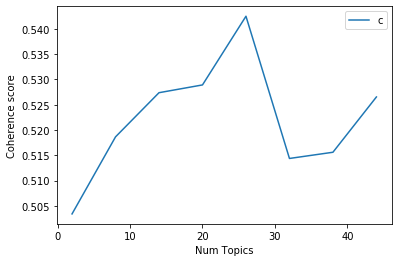

In [6]:
from tqdm import tqdm
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
    limit = 50; #토픽 마지막갯수
    start = 2; #토픽 시작갯수
    step = 6; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('./everytime_seoul_tokenized.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data) # 출현빈도가 적거나 자주 등장하는 단어는 제거 
dictionary.filter_extremes(no_below=10, no_above=0.05)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, processed_data)

### LDA 시각화 

In [19]:
!pip install pyLDAvis

In [7]:
import gensim
NUM_TOPICS = 26 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2020-11-22 16:03:39,138 : INFO : using symmetric alpha at 0.038461538461538464
2020-11-22 16:03:39,140 : INFO : using symmetric eta at 0.038461538461538464
2020-11-22 16:03:39,142 : INFO : using serial LDA version on this node
2020-11-22 16:03:39,147 : INFO : running online (multi-pass) LDA training, 26 topics, 15 passes over the supplied corpus of 1234 documents, updating model once every 1234 documents, evaluating perplexity every 1234 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-22 16:03:39,793 : INFO : -9.032 per-word bound, 523.4 perplexity estimate based on a held-out corpus of 1234 documents with 2846 words
2020-11-22 16:03:39,796 : INFO : PROGRESS: pass 0, at document #1234/1234
2020-11-22 16:03:40,256 : INFO : topic #10 (0.038): 0.061*"언제" + 0.049*"대학" + 0.049*"성적" + 0.049*"건가" + 0.042*"안내" + 0.042*"개강" + 0.037*"과목" + 0.037*"공지" + 0.037*"다른" + 0.037*"완화"
2020-11-22 16:03:40,258 : INFO : topic #4 (0.038): 0.151*"등록금" + 0.057*"휴학" + 0.047*"비대" + 0.03

2020-11-22 16:03:45,752 : INFO : topic #20 (0.038): 0.354*"마스크" + 0.148*"정말" + 0.097*"갑자기" + 0.079*"바이러스" + 0.058*"가족" + 0.035*"카페" + 0.035*"오늘" + 0.029*"원래" + 0.022*"정도" + 0.017*"확산"
2020-11-22 16:03:45,754 : INFO : topic #13 (0.038): 0.382*"친구" + 0.198*"동아리" + 0.149*"활동" + 0.031*"계속" + 0.026*"하나" + 0.026*"요즘" + 0.021*"새내기" + 0.020*"인문" + 0.018*"점점" + 0.011*"기사"
2020-11-22 16:03:45,757 : INFO : topic #4 (0.038): 0.435*"등록금" + 0.119*"만원" + 0.079*"거리" + 0.074*"때매" + 0.044*"의견" + 0.028*"만약" + 0.024*"대한" + 0.021*"휴학" + 0.015*"성적" + 0.012*"경우"
2020-11-22 16:03:45,761 : INFO : topic diff=0.697154, rho=0.353553
2020-11-22 16:03:46,276 : INFO : -5.425 per-word bound, 43.0 perplexity estimate based on a held-out corpus of 1234 documents with 2846 words
2020-11-22 16:03:46,278 : INFO : PROGRESS: pass 7, at document #1234/1234
2020-11-22 16:03:46,624 : INFO : topic #9 (0.038): 0.110*"서울" + 0.109*"학우" + 0.106*"대학" + 0.097*"이해" + 0.094*"생활" + 0.066*"새내기" + 0.064*"여러분" + 0.038*"총학생회" + 0.034*"명지대" 

2020-11-22 16:03:51,438 : INFO : topic #5 (0.038): 0.409*"비대" + 0.202*"학년" + 0.154*"졸업" + 0.122*"내년" + 0.036*"복학" + 0.010*"위원회" + 0.006*"휴학" + 0.003*"예정" + 0.002*"대학" + 0.002*"건가"
2020-11-22 16:03:51,440 : INFO : topic #1 (0.038): 0.273*"다른" + 0.231*"다시" + 0.152*"고민" + 0.086*"올해" + 0.051*"증상" + 0.041*"하나" + 0.040*"갑자기" + 0.031*"상황" + 0.022*"학우" + 0.011*"때매"
2020-11-22 16:03:51,442 : INFO : topic #22 (0.038): 0.415*"교수" + 0.376*"시간" + 0.050*"과제" + 0.022*"요즘" + 0.022*"만약" + 0.019*"존나" + 0.016*"온라인" + 0.011*"카페" + 0.007*"그냥" + 0.003*"비대"
2020-11-22 16:03:51,444 : INFO : topic diff=0.350815, rho=0.258199
2020-11-22 16:03:51,937 : INFO : -5.170 per-word bound, 36.0 perplexity estimate based on a held-out corpus of 1234 documents with 2846 words
2020-11-22 16:03:51,939 : INFO : PROGRESS: pass 14, at document #1234/1234
2020-11-22 16:03:52,269 : INFO : topic #19 (0.038): 0.245*"과제" + 0.155*"관련" + 0.145*"과목" + 0.144*"발생" + 0.078*"교수" + 0.058*"대체" + 0.030*"문제" + 0.020*"동안" + 0.016*"확산" + 0.012*

(8, '0.368*"휴학" + 0.119*"등록" + 0.105*"확산" + 0.092*"난리"')
(19, '0.245*"과제" + 0.155*"관련" + 0.145*"과목" + 0.144*"발생"')
(1, '0.273*"다른" + 0.232*"다시" + 0.152*"고민" + 0.087*"올해"')
(0, '0.280*"강의" + 0.185*"봉사" + 0.118*"사랑" + 0.096*"중국"')
(3, '0.446*"진자" + 0.181*"개강" + 0.171*"원래" + 0.071*"가능"')
(6, '0.246*"교회" + 0.214*"신청" + 0.169*"제발" + 0.134*"추가"')
(20, '0.392*"마스크" + 0.161*"정말" + 0.110*"갑자기" + 0.091*"바이러스"')
(4, '0.460*"등록금" + 0.141*"만원" + 0.111*"거리" + 0.084*"때매"')
(9, '0.127*"서울" + 0.127*"학우" + 0.118*"이해" + 0.110*"생활"')
(15, '0.176*"명지대" + 0.097*"캠퍼스" + 0.086*"여러분" + 0.083*"인문"')
(21, '0.479*"성적" + 0.099*"걱정" + 0.089*"완화" + 0.075*"가요"')
(16, '0.362*"그냥" + 0.111*"지방" + 0.095*"복학" + 0.095*"처음"')
(12, '0.374*"알바" + 0.262*"보고" + 0.136*"결과" + 0.080*"대한"')
(22, '0.416*"교수" + 0.377*"시간" + 0.050*"과제" + 0.022*"요즘"')
(13, '0.438*"친구" + 0.216*"동아리" + 0.160*"활동" + 0.029*"새내기"')
(24, '0.163*"상황" + 0.150*"거의" + 0.146*"하루" + 0.115*"특별"')
(17, '0.286*"진행" + 0.194*"문제" + 0.143*"수도" + 0.125*"기준"')
(25, '0.185

In [8]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

2020-11-22 16:03:52,675 : INFO : NumExpr defaulting to 8 threads.


In [10]:
pyLDAvis.save_html(vis, '../docs/lda.html')

In [22]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        

        
        for j, (topic_num, prop_topic) in enumerate(doc): 
            if j == 0:  
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [37]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:26]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.0385,"[(0, 0.03846154), (1, 0.03846154), (2, 0.03846..."
1,1,4.0,0.2912,"[(3, 0.1483502), (4, 0.29121536), (6, 0.148351..."
2,2,6.0,0.4076,"[(6, 0.40761787), (7, 0.20776731), (24, 0.2076..."
3,3,0.0,0.0385,"[(0, 0.03846154), (1, 0.03846154), (2, 0.03846..."
4,4,20.0,0.5192,"[(0, 0.019230796), (1, 0.019230796), (2, 0.019..."
5,5,0.0,0.0385,"[(0, 0.03846154), (1, 0.03846154), (2, 0.03846..."
6,6,9.0,0.7596,"[(9, 0.75961524)]"
7,7,3.0,0.5192,"[(0, 0.019230803), (1, 0.019230803), (2, 0.019..."
8,8,24.0,0.5904,"[(1, 0.22501026), (24, 0.5903735)]"
9,9,0.0,0.0385,"[(0, 0.03846154), (1, 0.03846154), (2, 0.03846..."


In [38]:
for topic in topics:
    print(topic)

(13, '0.294*"졸업" + 0.276*"혹시" + 0.201*"확산" + 0.032*"예정"')
(23, '0.230*"봉사" + 0.156*"조금" + 0.136*"지원" + 0.133*"사랑"')
(9, '0.310*"과제" + 0.218*"학년" + 0.130*"문제" + 0.076*"존나"')
(5, '0.120*"인문" + 0.102*"캠퍼스" + 0.100*"운영" + 0.094*"명지대"')
(6, '0.203*"정도" + 0.148*"오늘" + 0.136*"정말" + 0.129*"고민"')
(21, '0.260*"개강" + 0.223*"비대" + 0.143*"관련" + 0.113*"사태"')
(17, '0.294*"보고" + 0.198*"교회" + 0.184*"다른" + 0.159*"신천지"')
(2, '0.277*"시간" + 0.209*"학점" + 0.129*"생활" + 0.125*"처음"')
(22, '0.217*"다시" + 0.183*"진행" + 0.096*"수도" + 0.093*"행사"')
(7, '0.433*"진자" + 0.189*"감염" + 0.189*"건가" + 0.091*"신청"')
(25, '0.257*"계속" + 0.193*"하나" + 0.125*"예정" + 0.103*"경우"')
(0, '0.254*"만원" + 0.169*"지급" + 0.160*"활동" + 0.158*"증상"')
(10, '0.316*"취소" + 0.171*"학과" + 0.167*"점점" + 0.086*"올해"')
(15, '0.309*"명지대" + 0.218*"가요" + 0.125*"추가" + 0.051*"다른"')
(4, '0.482*"친구" + 0.153*"요즘" + 0.143*"하루" + 0.111*"이유"')
(16, '0.356*"성적" + 0.243*"등록금" + 0.067*"공지" + 0.051*"특별"')
(24, '0.285*"그냥" + 0.241*"공부" + 0.109*"지방" + 0.094*"카페"')
(1, '0.303*"강의" 